CIFAR10-TRAIL1

In [ ]:
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

# Load and preprocess the CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

input_img = Input(shape=(32, 32, 3))

# Encoder layers
x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = Dropout(0.2)(x) # Add dropout
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.2)(x) # Add dropout
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder layers
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.2)(x) # Add dropout
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.2)(x) # Add dropout
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Set the learning rate and decay rate
lr = 0.001
decay_rate = lr / 80

# Create the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=lr, decay=decay_rate), loss='mse')

# Train the model
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_val, x_val))

# Evaluate the model
decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image =np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))


170498071/170498071 [==============================] - 4s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
157/157 [==============================] - 47s 189ms/step - loss: 0.0262 - val_loss: 0.0181
Epoch 2/50
157/157 [==============================] - 26s 167ms/step - loss: 0.0081 - val_loss: 0.0111
Epoch 3/50
157/157 [==============================] - 26s 168ms/step - loss: 0.0054 - val_loss: 0.0089
Epoch 4/50
157/157 [==============================] - 26s 166ms/step - loss: 0.0046 - val_loss: 0.0078
Epoch 5/50
157/157 [==============================] - 26s 167ms/step - loss: 0.0039 - val_loss: 0.0117
Epoch 6/50
157/157 [==============================] - 26s 168ms/step - loss: 0.0036 - val_loss: 0.0045
Epoch 7/50
157/157 [==============================] - 27s 175ms/step - loss: 0.0035 - val_loss: 0.0055
Epoch 8/50
157/157 [==============================] - 27s 169ms/step - loss: 0.0030 - val_loss: 0.0045
Epoch 9/50
157/157 [==============================] - 28s 176ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 10/50
157/157 [==============================] - 27s 170ms/step - l

AttributeError: ignored

In [ ]:
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image =np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))


<ipython-input-3-0e1ff3d92660>:13: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  37.75171650483577
min psnr:  20.560663524714762
max ssim:  0.9882683136702388
min ssim:  0.6281145392435388
28.583322747916355


In [ ]:
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split


In [ ]:
#ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))


x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='softmax', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs=30, batch_size=256, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)



170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/30
157/157 [==============================] - 25s 42ms/step - loss: 0.6304 - val_loss: 0.5971
Epoch 2/30
157/157 [==============================] - 5s 30ms/step - loss: 0.5934 - val_loss: 0.5873
Epoch 3/30
157/157 [==============================] - 5s 31ms/step - loss: 0.5861 - val_loss: 0.5831
Epoch 4/30
157/157 [==============================] - 5s 31ms/step - loss: 0.5822 - val_loss: 0.5777
Epoch 5/30
157/157 [==============================] - 5s 31ms/step - loss: 0.5789 - val_loss: 0.5752
Epoch 6/30
157/157 [==============================] - 5s 31ms/step - loss: 0.5772 - val_loss: 0.5750
Epoch 7/30
157/157 [==============================] - 5s 31ms/step - loss: 0.5753 - val_loss: 0.5761
Epoch 8/30
157/157 [==============================] - 5s 31ms/step - loss: 0.5745 - val_loss: 0.5788
Epoch 9/30
157/157 [==============================] - 5s 33ms/step - loss: 0.5736 - val_loss: 0.5718
Epoch 10/30
157/157 [==

313/313 [==============================] - 1s 3ms/step


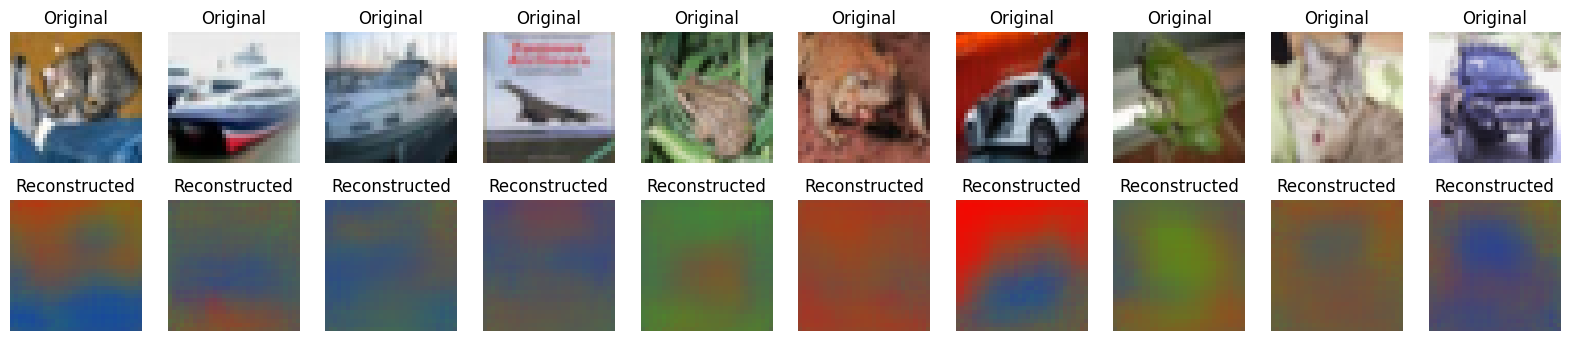

In [ ]:
import matplotlib.pyplot as plt

# Access values of decoded_imgs
decoded_imgs = autoencoder.predict(x_test)

# Visualize reconstructed images
n = 10 # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title('Original')
    plt.axis('off')
    
    # Display reconstructed image
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i])
    plt.title('Reconstructed')
    plt.axis('off')
plt.show()


In [ ]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

<ipython-input-4-d915a3a8844c>:16: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


In [ ]:
print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))

max psnr:  24.318506694161222
min psnr:  3.544703052181287
max ssim:  0.7021872797220329
min ssim:  -0.011689576225197632


TRIAL-2

In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset


x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


autoencoder.fit(x_train, x_train, epochs=30, batch_size=128, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)



Epoch 1/30
313/313 [==============================] - 11s 20ms/step - loss: 0.6134 - val_loss: 0.5882
Epoch 2/30
313/313 [==============================] - 6s 18ms/step - loss: 0.5865 - val_loss: 0.5806
Epoch 3/30
313/313 [==============================] - 5s 17ms/step - loss: 0.5796 - val_loss: 0.5747
Epoch 4/30
313/313 [==============================] - 6s 18ms/step - loss: 0.5760 - val_loss: 0.5726
Epoch 5/30
313/313 [==============================] - 5s 17ms/step - loss: 0.5740 - val_loss: 0.5707
Epoch 6/30
313/313 [==============================] - 6s 18ms/step - loss: 0.5727 - val_loss: 0.5712
Epoch 7/30
313/313 [==============================] - 5s 17ms/step - loss: 0.5712 - val_loss: 0.5689
Epoch 8/30
313/313 [==============================] - 6s 18ms/step - loss: 0.5704 - val_loss: 0.5699
Epoch 9/30
313/313 [==============================] - 5s 17ms/step - loss: 0.5693 - val_loss: 0.5672
Epoch 10/30
313/313 [==============================] - 5s 17ms/step - loss: 0.5687 - val_l

In [ ]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

<ipython-input-7-d915a3a8844c>:16: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


In [ ]:
print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))

max psnr:  33.813711583667704
min psnr:  16.574109916185122
max ssim:  0.942866556866302
min ssim:  0.4076555183185777


313/313 [==============================] - 2s 6ms/step


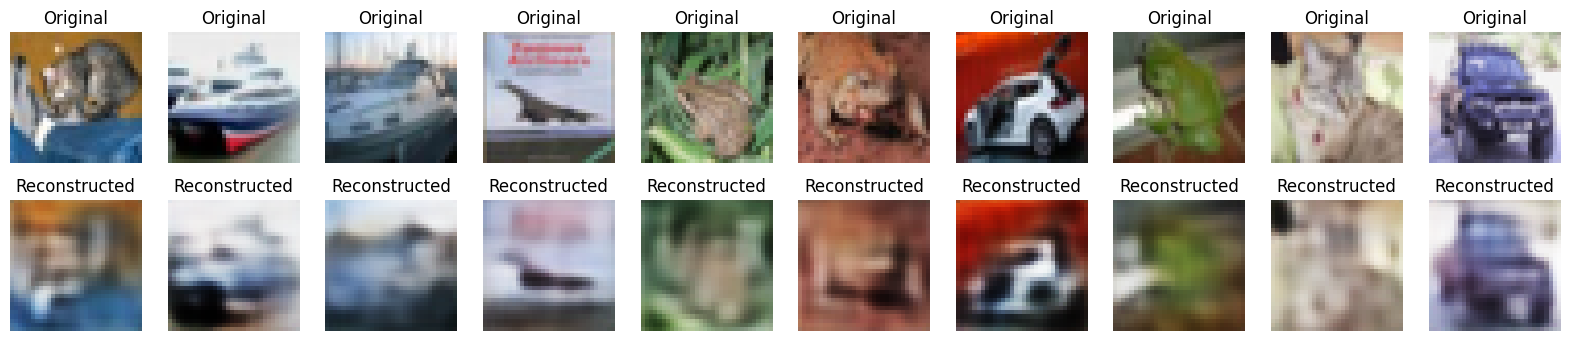

In [ ]:
import matplotlib.pyplot as plt


decoded_imgs = autoencoder.predict(x_test)

n = 10 # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title('Original')
    plt.axis('off')
    
    # Display reconstructed image
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i])
    plt.title('Reconstructed')
    plt.axis('off')
plt.show()


TRIAL 7

In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

input_img = Input(shape=(32, 32, 3))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


autoencoder.fit(x_train, x_train, epochs=30, batch_size=128, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)



Epoch 1/30
313/313 [==============================] - 8s 16ms/step - loss: 0.5957 - val_loss: 0.5840
Epoch 2/30
313/313 [==============================] - 6s 18ms/step - loss: 0.5765 - val_loss: 0.5731
Epoch 3/30
313/313 [==============================] - 5s 15ms/step - loss: 0.5728 - val_loss: 0.5717
Epoch 4/30
313/313 [==============================] - 5s 16ms/step - loss: 0.5711 - val_loss: 0.5675
Epoch 5/30
313/313 [==============================] - 4s 13ms/step - loss: 0.5693 - val_loss: 0.5661
Epoch 6/30
313/313 [==============================] - 4s 12ms/step - loss: 0.5679 - val_loss: 0.5657
Epoch 7/30
313/313 [==============================] - 4s 14ms/step - loss: 0.5669 - val_loss: 0.5647
Epoch 8/30
313/313 [==============================] - 4s 14ms/step - loss: 0.5666 - val_loss: 0.5636
Epoch 9/30
313/313 [==============================] - 4s 14ms/step - loss: 0.5652 - val_loss: 0.5624
Epoch 10/30
313/313 [==============================] - 6s 18ms/step - loss: 0.5644 - val_lo

313/313 [==============================] - 2s 6ms/step


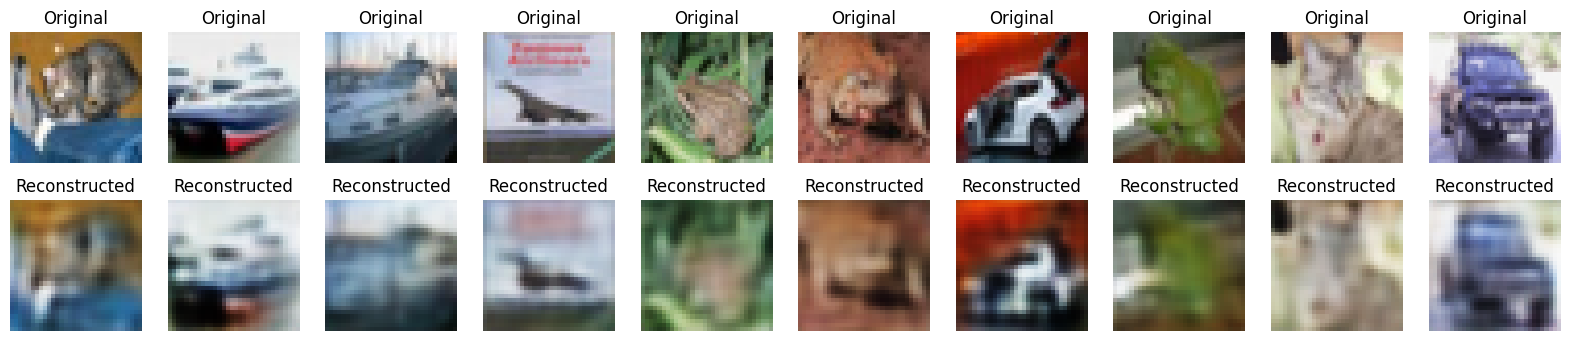

In [ ]:
import matplotlib.pyplot as plt


decoded_imgs = autoencoder.predict(x_test)

n = 10 # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title('Original')
    plt.axis('off')
    
    # Display reconstructed image
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i])
    plt.title('Reconstructed')
    plt.axis('off')
plt.show()


In [ ]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

<ipython-input-11-d915a3a8844c>:16: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


In [ ]:
print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.median(psnr_scores, axis=0))

max psnr:  32.89650614853462
min psnr:  16.958948680858935
max ssim:  0.9421816872797625
min ssim:  0.44050046412366495
23.276071053229998


In [ ]:
print(np.count())

Trail 8 
Learning of adam optimizer is 0.001

In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset

from keras.optimizers import Adam
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy')


autoencoder.fit(x_train, x_train, epochs=30, batch_size=128, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)



/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
313/313 [==============================] - 7s 20ms/step - loss: 0.6187 - val_loss: 0.5912
Epoch 2/30
313/313 [==============================] - 6s 19ms/step - loss: 0.5868 - val_loss: 0.5834
Epoch 3/30
313/313 [==============================] - 6s 19ms/step - loss: 0.5796 - val_loss: 0.5768
Epoch 4/30
313/313 [==============================] - 7s 21ms/step - loss: 0.5765 - val_loss: 0.5747
Epoch 5/30
313/313 [==============================] - 6s 19ms/step - loss: 0.5743 - val_loss: 0.5710
Epoch 6/30
313/313 [==============================] - 7s 22ms/step - loss: 0.5727 - val_loss: 0.5704
Epoch 7/30
313/313 [==============================] - 6s 19ms/step - loss: 0.5717 - val_loss: 0.5697
Epoch 8/30
313/313 [==============================] - 6s 18ms/step - loss: 0.5711 - val_loss: 0.5684
Epoch 9/30
313/313 [==============================] - 5s 17ms/step - loss: 0.5699 - val_loss: 0.5683
Epoch 10/30
313/313 [==============================] - 5s 17ms/step - loss: 0.5690 - val_lo

In [ ]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

<ipython-input-10-d915a3a8844c>:16: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


In [ ]:
print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))

max psnr:  34.10561505938939
min psnr:  16.64465356277251
max ssim:  0.9466942760543541
min ssim:  0.3904551141347358


Trial 9
increasing learning rate to 0.01

In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset

from keras.optimizers import Adam
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy')


autoencoder.fit(x_train, x_train, epochs=20, batch_size=128, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))

Epoch 1/20
313/313 [==============================] - 7s 20ms/step - loss: 0.7473 - val_loss: 0.6894
Epoch 2/20
313/313 [==============================] - 5s 18ms/step - loss: 0.6895 - val_loss: 0.6892
Epoch 3/20
313/313 [==============================] - 5s 18ms/step - loss: 0.6894 - val_loss: 0.6894
Epoch 4/20
313/313 [==============================] - 5s 16ms/step - loss: 0.6895 - val_loss: 0.6896
Epoch 5/20
313/313 [==============================] - 5s 17ms/step - loss: 0.6894 - val_loss: 0.6892
Epoch 6/20
313/313 [==============================] - 5s 16ms/step - loss: 0.6893 - val_loss: 0.6891
Epoch 7/20
313/313 [==============================] - 5s 17ms/step - loss: 0.6893 - val_loss: 0.6892
Epoch 8/20
313/313 [==============================] - 5s 17ms/step - loss: 0.6894 - val_loss: 0.6892
Epoch 9/20
313/313 [==============================] - 5s 16ms/step - loss: 0.6893 - val_loss: 0.6893
Epoch 10/20
313/313 [==============================] - 5s 17ms/step - loss: 0.6893 - val_lo

<ipython-input-13-5780164db1d8>:48: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  23.7450711221897
min psnr:  5.652718200137725
max ssim:  0.7180360126786752
min ssim:  -0.006482718910843176


Trial 10 lr=0.005

In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset

from keras.optimizers import Adam
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy')


autoencoder.fit(x_train, x_train, epochs=20, batch_size=128, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))

Epoch 1/20
313/313 [==============================] - 7s 19ms/step - loss: 0.6758 - val_loss: 0.6113
Epoch 2/20
313/313 [==============================] - 5s 17ms/step - loss: 0.6060 - val_loss: 0.5991
Epoch 3/20
313/313 [==============================] - 5s 17ms/step - loss: 0.5978 - val_loss: 0.5920
Epoch 4/20
313/313 [==============================] - 5s 17ms/step - loss: 0.5912 - val_loss: 0.5982
Epoch 5/20
313/313 [==============================] - 5s 17ms/step - loss: 0.5885 - val_loss: 0.5850
Epoch 6/20
313/313 [==============================] - 5s 17ms/step - loss: 0.5867 - val_loss: 0.5836
Epoch 7/20
313/313 [==============================] - 5s 17ms/step - loss: 0.5854 - val_loss: 0.5826
Epoch 8/20
313/313 [==============================] - 5s 16ms/step - loss: 0.5841 - val_loss: 0.5838
Epoch 9/20
313/313 [==============================] - 5s 18ms/step - loss: 0.5830 - val_loss: 0.5812
Epoch 10/20
313/313 [==============================] - 5s 16ms/step - loss: 0.5823 - val_lo

<ipython-input-14-72816bf68cbb>:48: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  29.050860574435426
min psnr:  13.294169758038352
max ssim:  0.85692182207144
min ssim:  0.2088524190029063


Trial 11 lr=0.005 and epochs=50

In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset

from keras.optimizers import Adam
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.005), loss='binary_crossentropy')


autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))

Epoch 1/50
313/313 [==============================] - 7s 20ms/step - loss: 0.6572 - val_loss: 0.6103
Epoch 2/50
313/313 [==============================] - 5s 17ms/step - loss: 0.6034 - val_loss: 0.5947
Epoch 3/50
313/313 [==============================] - 5s 16ms/step - loss: 0.5935 - val_loss: 0.5900
Epoch 4/50
313/313 [==============================] - 5s 17ms/step - loss: 0.5900 - val_loss: 0.5859
Epoch 5/50
313/313 [==============================] - 5s 17ms/step - loss: 0.5872 - val_loss: 0.5865
Epoch 6/50
313/313 [==============================] - 5s 18ms/step - loss: 0.5857 - val_loss: 0.5852
Epoch 7/50
313/313 [==============================] - 5s 17ms/step - loss: 0.5845 - val_loss: 0.5819
Epoch 8/50
313/313 [==============================] - 5s 17ms/step - loss: 0.5839 - val_loss: 0.5809
Epoch 9/50
313/313 [==============================] - 5s 17ms/step - loss: 0.5832 - val_loss: 0.5811
Epoch 10/50
313/313 [==============================] - 5s 17ms/step - loss: 0.5827 - val_lo

<ipython-input-15-cc8792814fb9>:48: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  29.31657065401563
min psnr:  12.856688233041691
max ssim:  0.8835639433416963
min ssim:  0.16199679768170946


In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy')


autoencoder.fit(x_train, x_train, epochs=30, batch_size=128, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

170498071/170498071 [==============================] - 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
313/313 [==============================] - 16s 19ms/step - loss: 0.6302 - val_loss: 0.6046
Epoch 2/30
313/313 [==============================] - 5s 15ms/step - loss: 0.6017 - val_loss: 0.5960
Epoch 3/30
313/313 [==============================] - 5s 15ms/step - loss: 0.5950 - val_loss: 0.5907
Epoch 4/30
313/313 [==============================] - 5s 16ms/step - loss: 0.5914 - val_loss: 0.5885
Epoch 5/30
313/313 [==============================] - 5s 15ms/step - loss: 0.5887 - val_loss: 0.5858
Epoch 6/30
313/313 [==============================] - 5s 15ms/step - loss: 0.5870 - val_loss: 0.5853
Epoch 7/30
313/313 [==============================] - 5s 16ms/step - loss: 0.5854 - val_loss: 0.5829
Epoch 8/30
313/313 [==============================] - 5s 15ms/step - loss: 0.5841 - val_loss: 0.5838
Epoch 9/30
313/313 [==============================] - 5s 15ms/step - loss: 0.5828 - val_loss: 0.5804
Epoch 10/30
313/313 [==============================] - 5s 16ms/step - loss: 0.5817 - val_l

<ipython-input-2-4912f8457afd>:60: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  31.417923861518066
min psnr:  13.69835102571729
max ssim:  0.8850375341441534
min ssim:  0.23980799918353887


In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy')


autoencoder.fit(x_train, x_train, epochs=20, batch_size=128, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
313/313 [==============================] - 6s 18ms/step - loss: 0.6319 - val_loss: 0.6073
Epoch 2/20
313/313 [==============================] - 5s 16ms/step - loss: 0.6028 - val_loss: 0.5962
Epoch 3/20
313/313 [==============================] - 5s 15ms/step - loss: 0.5959 - val_loss: 0.5920
Epoch 4/20
313/313 [==============================] - 5s 15ms/step - loss: 0.5921 - val_loss: 0.5891
Epoch 5/20
313/313 [==============================] - 5s 15ms/step - loss: 0.5890 - val_loss: 0.5867
Epoch 6/20
313/313 [==============================] - 5s 16ms/step - loss: 0.5871 - val_loss: 0.5841
Epoch 7/20
313/313 [==============================] - 5s 16ms/step - loss: 0.5855 - val_loss: 0.5830
Epoch 8/20
313/313 [==============================] - 5s 15ms/step - loss: 0.5840 - val_loss: 0.5826
Epoch 9/20
313/313 [==============================] - 5s 16ms/step - loss: 0.5829 - val_loss: 0.5811
Epoch 10/20
313/313 [==============================] - 5s 17ms/step - loss: 0.5818 - val_lo

<ipython-input-6-5a71764c512c>:60: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  31.36511771759743
min psnr:  13.22842841664809
max ssim:  0.8459949678467122
min ssim:  0.21106901257706523
20.079337302385312


In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
epochs=30
lr=0.001
decay_rate=lr/epochs

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001,decay=decay_rate), loss='binary_crossentropy')


autoencoder.fit(x_train, x_train, epochs=20, batch_size=128, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
313/313 [==============================] - 7s 18ms/step - loss: 0.6167 - val_loss: 0.5889
Epoch 2/20
313/313 [==============================] - 5s 16ms/step - loss: 0.5857 - val_loss: 0.5803
Epoch 3/20
313/313 [==============================] - 5s 16ms/step - loss: 0.5800 - val_loss: 0.5776
Epoch 4/20
313/313 [==============================] - 5s 15ms/step - loss: 0.5763 - val_loss: 0.5726
Epoch 5/20
313/313 [==============================] - 5s 15ms/step - loss: 0.5740 - val_loss: 0.5720
Epoch 6/20
313/313 [==============================] - 5s 16ms/step - loss: 0.5723 - val_loss: 0.5698
Epoch 7/20
313/313 [==============================] - 5s 15ms/step - loss: 0.5715 - val_loss: 0.5688
Epoch 8/20
313/313 [==============================] - 5s 17ms/step - loss: 0.5703 - val_loss: 0.5675
Epoch 9/20
313/313 [==============================] - 5s 15ms/step - loss: 0.5696 - val_loss: 0.5671
Epoch 10/20
313/313 [==============================] - 5s 16ms/step - loss: 0.5686 - val_lo

<ipython-input-7-5b20f1fb0e7d>:63: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  33.56379316602235
min psnr:  15.974953740978465
max ssim:  0.9345263038979453
min ssim:  0.3215970981635287
22.502070627799064


In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
epochs=30
lr=0.001
decay_rate=lr/epochs

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001,decay=decay_rate), loss='binary_crossentropy')


autoencoder.fit(x_train, x_train, epochs=30, batch_size=128, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

Epoch 1/30
313/313 [==============================] - 8s 21ms/step - loss: 0.6086 - val_loss: 0.5865
Epoch 2/30
313/313 [==============================] - 5s 15ms/step - loss: 0.5847 - val_loss: 0.5796
Epoch 3/30
313/313 [==============================] - 5s 16ms/step - loss: 0.5789 - val_loss: 0.5749
Epoch 4/30
313/313 [==============================] - 5s 15ms/step - loss: 0.5765 - val_loss: 0.5727
Epoch 5/30
313/313 [==============================] - 5s 15ms/step - loss: 0.5738 - val_loss: 0.5710
Epoch 6/30
313/313 [==============================] - 5s 15ms/step - loss: 0.5724 - val_loss: 0.5695
Epoch 7/30
313/313 [==============================] - 5s 15ms/step - loss: 0.5714 - val_loss: 0.5691
Epoch 8/30
313/313 [==============================] - 5s 16ms/step - loss: 0.5704 - val_loss: 0.5680
Epoch 9/30
313/313 [==============================] - 5s 15ms/step - loss: 0.5697 - val_loss: 0.5683
Epoch 10/30
313/313 [==============================] - 5s 16ms/step - loss: 0.5688 - val_lo

<ipython-input-8-eda3bbaf2f6e>:63: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  33.93493518538185
min psnr:  16.827967561150142
max ssim:  0.9553124382936508
min ssim:  0.39157077988066885
23.121845051676086


In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# epochs=30
lr=0.001
decay_rate=lr/50

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001,decay=decay_rate), loss='binary_crossentropy')


autoencoder.fit(x_train, x_train, epochs=35, batch_size=128, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

Epoch 1/35
313/313 [==============================] - 7s 19ms/step - loss: 0.5924 - val_loss: 0.5737
Epoch 2/35
313/313 [==============================] - 4s 13ms/step - loss: 0.5737 - val_loss: 0.5699
Epoch 3/35
313/313 [==============================] - 4s 13ms/step - loss: 0.5706 - val_loss: 0.5674
Epoch 4/35
313/313 [==============================] - 4s 13ms/step - loss: 0.5682 - val_loss: 0.5646
Epoch 5/35
313/313 [==============================] - 4s 13ms/step - loss: 0.5671 - val_loss: 0.5636
Epoch 6/35
313/313 [==============================] - 4s 13ms/step - loss: 0.5651 - val_loss: 0.5618
Epoch 7/35
313/313 [==============================] - 4s 13ms/step - loss: 0.5639 - val_loss: 0.5620
Epoch 8/35
313/313 [==============================] - 4s 13ms/step - loss: 0.5632 - val_loss: 0.5611
Epoch 9/35
313/313 [==============================] - 4s 13ms/step - loss: 0.5625 - val_loss: 0.5622
Epoch 10/35
313/313 [==============================] - 4s 13ms/step - loss: 0.5618 - val_lo

<ipython-input-9-6717b320db4c>:59: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  35.23539018721096
min psnr:  17.225335734487857
max ssim:  0.9600975246036886
min ssim:  0.5168396118285719
24.566529688174725


In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# epochs=30
lr=0.001
decay_rate=lr/50

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001,decay=decay_rate), loss='binary_crossentropy')


autoencoder.fit(x_train, x_train, epochs=45, batch_size=256, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

Epoch 1/45
157/157 [==============================] - 8s 37ms/step - loss: 0.6045 - val_loss: 0.5826
Epoch 2/45
157/157 [==============================] - 4s 23ms/step - loss: 0.5795 - val_loss: 0.5748
Epoch 3/45
157/157 [==============================] - 4s 23ms/step - loss: 0.5753 - val_loss: 0.5717
Epoch 4/45
157/157 [==============================] - 4s 24ms/step - loss: 0.5727 - val_loss: 0.5697
Epoch 5/45
157/157 [==============================] - 4s 23ms/step - loss: 0.5713 - val_loss: 0.5681
Epoch 6/45
157/157 [==============================] - 4s 23ms/step - loss: 0.5698 - val_loss: 0.5781
Epoch 7/45
157/157 [==============================] - 4s 24ms/step - loss: 0.5695 - val_loss: 0.5655
Epoch 8/45
157/157 [==============================] - 4s 24ms/step - loss: 0.5674 - val_loss: 0.5645
Epoch 9/45
157/157 [==============================] - 4s 23ms/step - loss: 0.5665 - val_loss: 0.5641
Epoch 10/45
157/157 [==============================] - 4s 23ms/step - loss: 0.5658 - val_lo

<ipython-input-10-24e72c4db7cd>:59: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  33.89242728720988
min psnr:  16.90827247365934
max ssim:  0.9510290608453534
min ssim:  0.4883901121265563
24.1222368468968


In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# epochs=30
lr=0.001
decay_rate=lr/50

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001,decay=decay_rate), loss='binary_crossentropy')


autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

Epoch 1/50
157/157 [==============================] - 6s 29ms/step - loss: 0.5901 - val_loss: 0.5672
Epoch 2/50
157/157 [==============================] - 4s 23ms/step - loss: 0.5659 - val_loss: 0.5616
Epoch 3/50
157/157 [==============================] - 4s 24ms/step - loss: 0.5627 - val_loss: 0.5600
Epoch 4/50
157/157 [==============================] - 3s 20ms/step - loss: 0.5612 - val_loss: 0.5585
Epoch 5/50
157/157 [==============================] - 3s 20ms/step - loss: 0.5603 - val_loss: 0.5578
Epoch 6/50
157/157 [==============================] - 3s 20ms/step - loss: 0.5596 - val_loss: 0.5570
Epoch 7/50
157/157 [==============================] - 4s 23ms/step - loss: 0.5590 - val_loss: 0.5564
Epoch 8/50
157/157 [==============================] - 3s 20ms/step - loss: 0.5585 - val_loss: 0.5561
Epoch 9/50
157/157 [==============================] - 3s 20ms/step - loss: 0.5582 - val_loss: 0.5559
Epoch 10/50
157/157 [==============================] - 3s 20ms/step - loss: 0.5577 - val_lo

<ipython-input-11-014d467ca987>:55: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  37.80437470418599
min psnr:  18.599862086109173
max ssim:  0.9757890779628161
min ssim:  0.6070195914262548
27.114368651535443


In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
# import numpy as np
# from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
# from keras.models import Model
# from keras.datasets import cifar10
# from sklearn.model_selection import train_test_split
# from keras.optimizers import Adam
# (x_train, _), (x_test, _) = cifar10.load_data()
# x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
# x_train = x_train.astype('float32') / 255.
# x_val = x_val.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.


# input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# epochs=30
lr=0.002
decay_rate=lr/80

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001,decay=decay_rate), loss='binary_crossentropy')


autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

Epoch 1/50
157/157 [==============================] - 6s 33ms/step - loss: 0.5908 - val_loss: 0.5663
Epoch 2/50
157/157 [==============================] - 3s 21ms/step - loss: 0.5656 - val_loss: 0.5618
Epoch 3/50
157/157 [==============================] - 4s 23ms/step - loss: 0.5626 - val_loss: 0.5596
Epoch 4/50
157/157 [==============================] - 4s 26ms/step - loss: 0.5609 - val_loss: 0.5590
Epoch 5/50
157/157 [==============================] - 3s 20ms/step - loss: 0.5601 - val_loss: 0.5575
Epoch 6/50
157/157 [==============================] - 3s 20ms/step - loss: 0.5592 - val_loss: 0.5572
Epoch 7/50
157/157 [==============================] - 3s 20ms/step - loss: 0.5586 - val_loss: 0.5564
Epoch 8/50
157/157 [==============================] - 3s 21ms/step - loss: 0.5582 - val_loss: 0.5568
Epoch 9/50
157/157 [==============================] - 3s 20ms/step - loss: 0.5579 - val_loss: 0.5553
Epoch 10/50
157/157 [==============================] - 3s 20ms/step - loss: 0.5573 - val_lo

<ipython-input-12-0e9a584700e8>:55: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  38.117253067829445
min psnr:  18.866923560190486
max ssim:  0.9805907759951943
min ssim:  0.612432770000192
27.3211003121306


In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# epochs=30
lr=0.0015
decay_rate=lr/100

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001,decay=decay_rate), loss='binary_crossentropy')


autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

Epoch 1/50
157/157 [==============================] - 5s 28ms/step - loss: 0.5893 - val_loss: 0.5663
Epoch 2/50
157/157 [==============================] - 4s 24ms/step - loss: 0.5661 - val_loss: 0.5616
Epoch 3/50
157/157 [==============================] - 4s 28ms/step - loss: 0.5632 - val_loss: 0.5598
Epoch 4/50
157/157 [==============================] - 4s 27ms/step - loss: 0.5613 - val_loss: 0.5584
Epoch 5/50
157/157 [==============================] - 4s 25ms/step - loss: 0.5602 - val_loss: 0.5575
Epoch 6/50
157/157 [==============================] - 4s 26ms/step - loss: 0.5593 - val_loss: 0.5591
Epoch 7/50
157/157 [==============================] - 4s 24ms/step - loss: 0.5588 - val_loss: 0.5568
Epoch 8/50
157/157 [==============================] - 3s 21ms/step - loss: 0.5582 - val_loss: 0.5562
Epoch 9/50
157/157 [==============================] - 4s 24ms/step - loss: 0.5579 - val_loss: 0.5559
Epoch 10/50
157/157 [==============================] - 4s 23ms/step - loss: 0.5576 - val_lo

<ipython-input-3-f9afee357229>:55: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  37.6793827389291
min psnr:  18.883016796908553
max ssim:  0.976354716553919
min ssim:  0.6145682025781497
27.123544016409124


Loss function mse
add one more layer

In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# epochs=30
lr=0.001
decay_rate=lr/80

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001,decay=decay_rate), loss='mse')


autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
157/157 [==============================] - 14s 26ms/step - loss: 0.0170 - val_loss: 0.0080
Epoch 2/50
157/157 [==============================] - 3s 19ms/step - loss: 0.0071 - val_loss: 0.0062
Epoch 3/50
157/157 [==============================] - 3s 19ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 4/50
157/157 [==============================] - 3s 20ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 5/50
157/157 [==============================] - 3s 19ms/step - loss: 0.0046 - val_loss: 0.0045
Epoch 6/50
157/157 [==============================] - 3s 19ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 7/50
157/157 [==============================] - 3s 19ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 8/50
157/157 [==============================] - 3s 20ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 9/50
157/157 [==============================] - 3s 19ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 10/50
157/157 [==============================] - 3s 19ms/step - loss: 0.0039 - val_l

<ipython-input-2-5ff7cdaa8eb5>:55: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  39.19657445762719
min psnr:  18.98838638309457
max ssim:  0.9787972503001718
min ssim:  0.6048103753745339
27.424794487557847


In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)


decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# epochs=30
lr=0.001
decay_rate=lr/80

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001,decay=decay_rate), loss='mse')


autoencoder.fit(x_train, x_train, epochs=40, batch_size=256, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

Epoch 1/40
157/157 [==============================] - 7s 30ms/step - loss: 0.0243 - val_loss: 0.0149
Epoch 2/40
157/157 [==============================] - 4s 25ms/step - loss: 0.0132 - val_loss: 0.0125
Epoch 3/40
157/157 [==============================] - 4s 24ms/step - loss: 0.0114 - val_loss: 0.0106
Epoch 4/40
157/157 [==============================] - 4s 25ms/step - loss: 0.0105 - val_loss: 0.0100
Epoch 5/40
157/157 [==============================] - 3s 22ms/step - loss: 0.0100 - val_loss: 0.0098
Epoch 6/40
157/157 [==============================] - 3s 21ms/step - loss: 0.0095 - val_loss: 0.0091
Epoch 7/40
157/157 [==============================] - 3s 22ms/step - loss: 0.0090 - val_loss: 0.0087
Epoch 8/40
157/157 [==============================] - 3s 21ms/step - loss: 0.0089 - val_loss: 0.0086
Epoch 9/40
157/157 [==============================] - 3s 21ms/step - loss: 0.0083 - val_loss: 0.0087
Epoch 10/40
157/157 [==============================] - 4s 23ms/step - loss: 0.0082 - val_lo

<ipython-input-5-2c17d71d6ffa>:62: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  34.81313113976712
min psnr:  16.98281247261756
max ssim:  0.9467161918407947
min ssim:  0.43261296556494355
23.57247466026009


In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)


decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# epochs=30
lr=0.0005
decay_rate=lr/40

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.005,decay=decay_rate), loss='mse')


autoencoder.fit(x_train, x_train, epochs=40, batch_size=256, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

170498071/170498071 [==============================] - 13s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/40
157/157 [==============================] - 14s 27ms/step - loss: 0.0161 - val_loss: 0.0075
Epoch 2/40
157/157 [==============================] - 3s 19ms/step - loss: 0.0065 - val_loss: 0.0055
Epoch 3/40
157/157 [==============================] - 3s 20ms/step - loss: 0.0055 - val_loss: 0.0048
Epoch 4/40
157/157 [==============================] - 3s 18ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 5/40
157/157 [==============================] - 3s 18ms/step - loss: 0.0045 - val_loss: 0.0041
Epoch 6/40
157/157 [==============================] - 3s 18ms/step - loss: 0.0042 - val_loss: 0.0038
Epoch 7/40
157/157 [==============================] - 3s 20ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 8/40
157/157 [==============================] - 3s 18ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 9/40
157/157 [==============================] - 3s 18ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 10/40
157/157 [==============================] - 3s 19ms/step - loss: 0.0036 - val_l

<ipython-input-1-d1c3766e2e60>:58: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  36.073024270736674
min psnr:  19.17686234028633
max ssim:  0.9778295420398712
min ssim:  0.6029161111574797
27.27136840189843


In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# epochs=30
lr=0.001
decay_rate=lr/80

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001,decay=decay_rate), loss='mse')


autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))
print(np.mean(ssim_scores))

170498071/170498071 [==============================] - 13s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
157/157 [==============================] - 15s 26ms/step - loss: 0.0213 - val_loss: 0.0114
Epoch 2/50
157/157 [==============================] - 3s 19ms/step - loss: 0.0096 - val_loss: 0.0084
Epoch 3/50
157/157 [==============================] - 3s 18ms/step - loss: 0.0078 - val_loss: 0.0074
Epoch 4/50
157/157 [==============================] - 3s 17ms/step - loss: 0.0071 - val_loss: 0.0068
Epoch 5/50
157/157 [==============================] - 3s 17ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 6/50
157/157 [==============================] - 3s 18ms/step - loss: 0.0064 - val_loss: 0.0070
Epoch 7/50
157/157 [==============================] - 4s 24ms/step - loss: 0.0062 - val_loss: 0.0063
Epoch 8/50
157/157 [==============================] - 4s 23ms/step - loss: 0.0060 - val_loss: 0.0060
Epoch 9/50
157/157 [==============================] - 4s 22ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 10/50
157/157 [==============================] - 3s 20ms/step - loss: 0.0057 - val_l

<ipython-input-1-e9efd268a498>:55: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  35.171483526327656
min psnr:  17.64674976651011
max ssim:  0.9605785624236179
min ssim:  0.5319612385087086
24.693038195156333


In [ ]:
print(np.mean(ssim_scores))

0.8363054802010229


In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# epochs=30
lr=0.001
decay_rate=lr/80

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001,decay=decay_rate), loss='mae')


autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

170498071/170498071 [==============================] - 13s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
157/157 [==============================] - 14s 27ms/step - loss: 0.0976 - val_loss: 0.0656
Epoch 2/50
157/157 [==============================] - 3s 18ms/step - loss: 0.0609 - val_loss: 0.0558
Epoch 3/50
157/157 [==============================] - 3s 19ms/step - loss: 0.0550 - val_loss: 0.0533
Epoch 4/50
157/157 [==============================] - 3s 18ms/step - loss: 0.0519 - val_loss: 0.0508
Epoch 5/50
157/157 [==============================] - 3s 20ms/step - loss: 0.0499 - val_loss: 0.0489
Epoch 6/50
157/157 [==============================] - 3s 19ms/step - loss: 0.0484 - val_loss: 0.0475
Epoch 7/50
157/157 [==============================] - 3s 19ms/step - loss: 0.0470 - val_loss: 0.0461
Epoch 8/50
157/157 [==============================] - 3s 18ms/step - loss: 0.0460 - val_loss: 0.0458
Epoch 9/50
157/157 [==============================] - 3s 20ms/step - loss: 0.0451 - val_loss: 0.0450
Epoch 10/50
157/157 [==============================] - 3s 19ms/step - loss: 0.0444 - val_l

<ipython-input-1-aa7a1a0aa06f>:55: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  37.31994775429355
min psnr:  18.44345752050108
max ssim:  0.9775223756999801
min ssim:  0.5981414961498507
26.83754252732636


In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# epochs=30
lr=0.001
decay_rate=lr/80

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001,decay=decay_rate), loss='mse')


autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

Epoch 1/50
157/157 [==============================] - 7s 36ms/step - loss: 0.0117 - val_loss: 0.0040
Epoch 2/50
157/157 [==============================] - 4s 26ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 3/50
157/157 [==============================] - 4s 26ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 4/50
157/157 [==============================] - 4s 27ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 5/50
157/157 [==============================] - 4s 26ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 6/50
157/157 [==============================] - 4s 24ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 7/50
157/157 [==============================] - 5s 32ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 8/50
157/157 [==============================] - 5s 31ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 9/50
157/157 [==============================] - 5s 32ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/50
157/157 [==============================] - 5s 33ms/step - loss: 0.0011 - val_lo

<ipython-input-3-7218eb8845ae>:51: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  39.27773631341789
min psnr:  24.8055642867891
max ssim:  0.9966961197475825
min ssim:  0.7177525187994868
32.5250948395968


In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# epochs=30
lr=0.001
decay_rate=lr/80

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001,decay=decay_rate), loss='mse')


autoencoder.fit(x_train, x_train, epochs=60, batch_size=256, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

Epoch 1/60
157/157 [==============================] - 16s 30ms/step - loss: 0.0169 - val_loss: 0.0083
Epoch 2/60
157/157 [==============================] - 4s 23ms/step - loss: 0.0070 - val_loss: 0.0061
Epoch 3/60
157/157 [==============================] - 4s 25ms/step - loss: 0.0057 - val_loss: 0.0052
Epoch 4/60
157/157 [==============================] - 4s 24ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 5/60
157/157 [==============================] - 4s 22ms/step - loss: 0.0048 - val_loss: 0.0050
Epoch 6/60
157/157 [==============================] - 4s 27ms/step - loss: 0.0044 - val_loss: 0.0047
Epoch 7/60
157/157 [==============================] - 3s 22ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 8/60
157/157 [==============================] - 3s 21ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 9/60
157/157 [==============================] - 3s 21ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 10/60
157/157 [==============================] - 3s 20ms/step - loss: 0.0038 - val_l

<ipython-input-2-afe4b8a948c7>:55: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  38.47795345716356
min psnr:  19.0733611504654
max ssim:  0.9806645919911321
min ssim:  0.6208860310005092
27.533170179056622


In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# epochs=30
lr=0.001
decay_rate=lr/80

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001,decay=decay_rate), loss='mse')


autoencoder.fit(x_train, x_train, epochs=60, batch_size=256, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

Epoch 1/60
157/157 [==============================] - 4s 19ms/step - loss: 0.0211 - val_loss: 0.0097
Epoch 2/60
157/157 [==============================] - 2s 14ms/step - loss: 0.0083 - val_loss: 0.0074
Epoch 3/60
157/157 [==============================] - 2s 13ms/step - loss: 0.0069 - val_loss: 0.0065
Epoch 4/60
157/157 [==============================] - 2s 13ms/step - loss: 0.0061 - val_loss: 0.0061
Epoch 5/60
157/157 [==============================] - 2s 14ms/step - loss: 0.0056 - val_loss: 0.0056
Epoch 6/60
157/157 [==============================] - 2s 14ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 7/60
157/157 [==============================] - 2s 15ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 8/60
157/157 [==============================] - 2s 14ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 9/60
157/157 [==============================] - 2s 13ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 10/60
157/157 [==============================] - 2s 13ms/step - loss: 0.0047 - val_lo

<ipython-input-3-3da864b69f62>:55: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  37.18995646219839
min psnr:  18.30875842818452
max ssim:  0.9722640141211537
min ssim:  0.5667010056013758
25.972455640987445


In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# epochs=30
lr=0.001
decay_rate=lr/80

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001,decay=decay_rate), loss='mean_squared_logarithmic_error')


autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

170498071/170498071 [==============================] - 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
157/157 [==============================] - 20s 46ms/step - loss: 0.0078 - val_loss: 0.0038
Epoch 2/50
157/157 [==============================] - 4s 27ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 3/50
157/157 [==============================] - 4s 28ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 4/50
157/157 [==============================] - 4s 29ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 5/50
157/157 [==============================] - 4s 26ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 6/50
157/157 [==============================] - 5s 30ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 7/50
157/157 [==============================] - 4s 25ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 8/50
157/157 [==============================] - 3s 22ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 9/50
157/157 [==============================] - 4s 23ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 10/50
157/157 [==============================] - 4s 27ms/step - loss: 0.0018 - val_l

<ipython-input-1-1ef52567785a>:55: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  38.12331735390526
min psnr:  18.993851391587203
max ssim:  0.9751715132945499
min ssim:  0.609862144079509
27.321428599812467


In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# epochs=30
lr=0.001
decay_rate=lr/80

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001,decay=decay_rate), loss='mse')


autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

Epoch 1/50
157/157 [==============================] - 6s 29ms/step - loss: 0.0153 - val_loss: 0.0047
Epoch 2/50
157/157 [==============================] - 2s 15ms/step - loss: 0.0037 - val_loss: 0.0031
Epoch 3/50
157/157 [==============================] - 2s 15ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 4/50
157/157 [==============================] - 2s 16ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 5/50
157/157 [==============================] - 3s 16ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 6/50
157/157 [==============================] - 3s 19ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 7/50
157/157 [==============================] - 2s 15ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 8/50
157/157 [==============================] - 2s 16ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 9/50
157/157 [==============================] - 2s 15ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 10/50
157/157 [==============================] - 3s 16ms/step - loss: 0.0014 - val_lo

<ipython-input-2-58bfd1dfb299>:51: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  40.52503770147264
min psnr:  21.790152656063132
max ssim:  0.993621490548254
min ssim:  0.6019810759034319
31.49432417081708


In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.3, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# epochs=30
lr=0.001
decay_rate=lr/80

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001,decay=decay_rate), loss='mse')


autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

170498071/170498071 [==============================] - 13s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
137/137 [==============================] - 15s 41ms/step - loss: 0.0130 - val_loss: 0.0040
Epoch 2/50
137/137 [==============================] - 3s 23ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 3/50
137/137 [==============================] - 3s 24ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 4/50
137/137 [==============================] - 4s 29ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 5/50
137/137 [==============================] - 3s 25ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 6/50
137/137 [==============================] - 3s 24ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 7/50
137/137 [==============================] - 3s 26ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 8/50
137/137 [==============================] - 4s 27ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 9/50
137/137 [==============================] - 3s 24ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 10/50
137/137 [==============================] - 4s 26ms/step - loss: 0.0014 - val_l

<ipython-input-1-98e8567e06f2>:51: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  39.62144698873682
min psnr:  23.21225513593722
max ssim:  0.995603032156828
min ssim:  0.6992152209746024
31.975919677046384


In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))
x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# epochs=30
lr=0.001
decay_rate=lr/80

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001,decay=decay_rate), loss='mse')


autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

Epoch 1/50
157/157 [==============================] - 9s 49ms/step - loss: 0.0096 - val_loss: 0.0028
Epoch 2/50
157/157 [==============================] - 6s 39ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 3/50
157/157 [==============================] - 6s 41ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 4/50
157/157 [==============================] - 6s 40ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/50
157/157 [==============================] - 7s 43ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 6/50
157/157 [==============================] - 6s 39ms/step - loss: 0.0010 - val_loss: 9.5118e-04
Epoch 7/50
157/157 [==============================] - 6s 41ms/step - loss: 9.3120e-04 - val_loss: 8.5662e-04
Epoch 8/50
157/157 [==============================] - 6s 39ms/step - loss: 8.6351e-04 - val_loss: 9.1027e-04
Epoch 9/50
157/157 [==============================] - 6s 40ms/step - loss: 8.0302e-04 - val_loss: 7.4418e-04
Epoch 10/50
157/157 [==============================] - 6s 37ms/

<ipython-input-3-a7d55a8ddc58>:51: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  44.32033473206398
min psnr:  26.50393267865639
max ssim:  0.9979369997466184
min ssim:  0.8339153746440234
35.272278134039716


In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D,Conv2DTranspose
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# epochs=30
lr=0.001
decay_rate=lr/80

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001,decay=decay_rate), loss='mse')


autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50


ValueError: ignored

In [ ]:
np.mean(ssim_scores)

0.9064169773583952

In [ ]:
c=0
for i in range(len(psnr_scores)):
  if psnr_scores[i]>30:
    c+=1
print(c,len(psnr_scores))

932 10000


In [ ]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import cv2
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from keras.optimizers import Adam

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define the encoder
encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
])

# Define the decoder
decoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Reshape((8, 8, 4)),
    tf.keras.layers.Conv2DTranspose(16, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same'),
])

# Define the autoencoder model
autoencoder = tf.keras.models.Sequential([encoder, decoder])

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(lr=0.001), loss='mse')

# Train the autoencoder model
autoencoder.fit(x_train, x_train, epochs=20, batch_size=128, validation_data=(x_test, x_test))

# Test the autoencoder model
x_pred = autoencoder.predict(x_test)

# Calculate PSNR and SSIM values
psnr_values = []
ssim_values = []
for i in range(len(x_test)):
    psnr_values.append(psnr(x_test[i], x_pred[i]))
    ssim_values.append(ssim(x_test[i], x_pred[i], multichannel=True))

# Print average PSNR and SSIM values
print('Average PSNR:', np.mean(psnr_values))
print('Average SSIM:', np.mean(ssim_values))


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
391/391 [==============================] - 8s 16ms/step - loss: 0.0389 - val_loss: 0.0234
Epoch 2/20
391/391 [==============================] - 4s 11ms/step - loss: 0.0194 - val_loss: 0.0176
Epoch 3/20
391/391 [==============================] - 4s 11ms/step - loss: 0.0169 - val_loss: 0.0170
Epoch 4/20
391/391 [==============================] - 5s 12ms/step - loss: 0.0162 - val_loss: 0.0160
Epoch 5/20
391/391 [==============================] - 4s 11ms/step - loss: 0.0157 - val_loss: 0.0159
Epoch 6/20
391/391 [==============================] - 4s 11ms/step - loss: 0.0154 - val_loss: 0.0152
Epoch 7/20
391/391 [==============================] - 5s 13ms/step - loss: 0.0152 - val_loss: 0.0152
Epoch 8/20
391/391 [==============================] - 4s 11ms/step - loss: 0.0150 - val_loss: 0.0149
Epoch 9/20
391/391 [==============================] - 4s 11ms/step - loss: 0.0149 - val_loss: 0.0147
Epoch 10/20
391/391 [==============================] - 5s 12ms/step - loss: 0.0147 - val_lo

<ipython-input-4-099184293867>:55: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_values.append(ssim(x_test[i], x_pred[i], multichannel=True))


Average PSNR: 19.187936512677414
Average SSIM: 0.6631675


Epoch 1/50


ValueError: ignored

In [ ]:
##ADDING EXTRA CONVOLUTION AND POOLING LAYERs IN ENCODER AND DECODER
# Load and preprocess the CIFAR-10 dataset
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
# epochs=30
lr=0.001
decay_rate=lr/50

# Create the  model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=0.001,decay=decay_rate), loss='mse')


autoencoder.fit(x_train, x_train, epochs=35, batch_size=128, validation_data=(x_val, x_val))

decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.apped(psnr_val)
    n
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

Epoch 1/35
313/313 [==============================] - 6s 17ms/step - loss: 0.0127 - val_loss: 0.0064
Epoch 2/35
313/313 [==============================] - 5s 16ms/step - loss: 0.0056 - val_loss: 0.0052
Epoch 3/35
313/313 [==============================] - 4s 13ms/step - loss: 0.0047 - val_loss: 0.0044
Epoch 4/35
313/313 [==============================] - 4s 13ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 5/35
313/313 [==============================] - 5s 16ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 6/35
313/313 [==============================] - 4s 12ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 7/35
313/313 [==============================] - 4s 13ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 8/35
313/313 [==============================] - 5s 16ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 9/35
313/313 [==============================] - 4s 13ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 10/35
313/313 [==============================] - 4s 13ms/step - loss: 0.0032 - val_lo

<ipython-input-3-63e4ebecdd0a>:55: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  34.90948590892095
min psnr:  18.992301326036678
max ssim:  0.978983872963424
min ssim:  0.6210406644088727
26.870822137528833


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from skimage.metrics import structural_similarity as ssim

# Load the image
img = cv2.imread('image.jpg')

# Resize the image to the desired shape
img = cv2.resize(img, (256, 256))

# Convert to float32 and normalize
img = img.astype('float32') / 255.0

# Define the input shape
input_shape = (256, 256, 3)

# Define the NICE architecture
def NICE(input_shape):
    inputs = tf.keras.layers.Input(shape=input_shape)
    
    # Split the image into two halves
    x1, x2 = tf.split(inputs, num_or_size_splits=2, axis=1)
    
    # Define the layers for x1 and x2
    for i in range(8):
        x1, x2 = tf.keras.layers.Dense(256, activation='relu')(x1), tf.keras.layers.Dense(256, activation='relu')(x2)
        x1, x2 = tf.keras.layers.BatchNormalization()(x1), tf.keras.layers.BatchNormalization()(x2)
        x1, x2 = tf.keras.layers.Dropout(0.2)(x1), tf.keras.layers.Dropout(0.2)(x2)
        x1, x2 = tf.keras.layers.Dense(256, activation='relu')(x1), tf.keras.layers.Dense(256, activation='relu')(x2)
        x1, x2 = tf.keras.layers.BatchNormalization()(x1), tf.keras.layers.BatchNormalization()(x2)
        x1, x2 = tf.keras.layers.Dropout(0.2)(x1), tf.keras.layers.Dropout(0.2)(x2)
    
    # Concatenate the two halves
    x = tf.keras.layers.Concatenate(axis=1)([x1, x2])
    
    # Define the output layer
    outputs = tf.keras.layers.Dense(3, activation='sigmoid')(x)
    
    # Define the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model

# Define the model
model = NICE(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x=np.array([img]), y=np.array([img]), epochs=10, batch_size=1)

# Test the model
decoded_img = model.predict(np.array([img]))

# Compute the PSNR and SSIM metrics for original and reconstructed images
psnr = cv2.PSNR(img, decoded_img[0])
ssim_score = ssim(img, decoded_img[0], multichannel=True)

# Print the PSNR and SSIM scores
print("PSNR:", psnr)
print("SSIM:", ssim_score)


In [ ]:
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

# Load and preprocess the CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

input_img = Input(shape=(32, 32, 3))

# Encoder layers
x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = Dropout(0.2)(x) # Add dropout
# x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.2)(x) # Add dropout
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder layers
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.2)(x) # Add dropout
# x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.2)(x) # Add dropout
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Set the learning rate and decay rate
lr = 0.001
decay_rate = lr / 80

# Create the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=lr, decay=decay_rate), loss='mse')

# Train the model
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_val, x_val))

# Evaluate the model
decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image =np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))


170498071/170498071 [==============================] - 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
157/157 [==============================] - 34s 135ms/step - loss: 0.0180 - val_loss: 0.0081
Epoch 2/50
157/157 [==============================] - 19s 124ms/step - loss: 0.0057 - val_loss: 0.0100
Epoch 3/50
157/157 [==============================] - 20s 125ms/step - loss: 0.0044 - val_loss: 0.0069
Epoch 4/50
157/157 [==============================] - 20s 127ms/step - loss: 0.0038 - val_loss: 0.0057
Epoch 5/50
157/157 [==============================] - 20s 128ms/step - loss: 0.0034 - val_loss: 0.0052
Epoch 6/50
157/157 [==============================] - 20s 130ms/step - loss: 0.0031 - val_loss: 0.0059
Epoch 7/50
157/157 [==============================] - 20s 128ms/step - loss: 0.0029 - val_loss: 0.0060
Epoch 8/50
157/157 [==============================] - 20s 127ms/step - loss: 0.0027 - val_loss: 0.0048
Epoch 9/50
157/157 [==============================] - 20s 128ms/step - loss: 0.0025 - val_loss: 0.0044
Epoch 10/50
157/157 [==============================] - 20s 129ms/step - l

NameError: ignored

In [ ]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image =np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))


<ipython-input-2-d8f20f322ce7>:17: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  35.88635316879671
min psnr:  21.166929681360887
max ssim:  0.982799027039956
min ssim:  0.6218996844872807
26.858030597814963


In [ ]:
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from keras.models import Model
from keras.datasets import cifar100
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# Load and preprocess the CIFAR-100 dataset
(x_train, _), (x_test, _) = cifar100.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

input_img = Input(shape=(32, 32, 3))

# Encoder layers
x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = Dropout(0.2)(x) # Add dropout
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.2)(x) # Add dropout
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder layers
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.2)(x) # Add dropout
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.2)(x) # Add dropout
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Set the learning rate and decay rate
lr = 0.001
decay_rate = lr / 80

# Create the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=lr, decay=decay_rate), loss='mse')

# Train the model
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_val, x_val))

# Evaluate the model
decoded_imgs = autoencoder.predict(x_test)
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)

    # Calculate PSNR and SSIM
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    ssim_scores.append(ssim(orig_image,recon_image,multichannel=True))

    # Calculate SSIM
print(max(psnr_scores))
print(min(psnr_scores))
print(max(ssim_scores))
print(min(ssim_scores))
print(np.mean(psnr_scores).np.mean(ssim_scores))

169001437/169001437 [==============================] - 32s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
157/157 [==============================] - 47s 195ms/step - loss: 0.0284 - val_loss: 0.0201
Epoch 2/50
157/157 [==============================] - 27s 174ms/step - loss: 0.0091 - val_loss: 0.0119
Epoch 3/50
157/157 [==============================] - 27s 175ms/step - loss: 0.0060 - val_loss: 0.0097
Epoch 4/50
157/157 [==============================] - 27s 172ms/step - loss: 0.0048 - val_loss: 0.0080
Epoch 5/50
157/157 [==============================] - 28s 177ms/step - loss: 0.0044 - val_loss: 0.0065
Epoch 6/50
157/157 [==============================] - 27s 170ms/step - loss: 0.0038 - val_loss: 0.0073
Epoch 7/50
157/157 [==============================] - 27s 171ms/step - loss: 0.0036 - val_loss: 0.0061
Epoch 8/50
157/157 [==============================] - 27s 171ms/step - loss: 0.0033 - val_loss: 0.0054
Epoch 9/50
157/157 [==============================] - 28s 177ms/step - loss: 0.0031 - val_loss: 0.0068
Epoch 10/50
157/157 [==============================] - 27s 171ms/step - l

ValueError: ignored

In [ ]:
psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image = np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)

    # Calculate PSNR and SSIM
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    ssim_scores.append(ssim(orig_image,recon_image,multichannel=True))

    # Calculate SSIM
print(max(psnr_scores))
print(min(psnr_scores))
print(max(ssim_scores))
print(min(ssim_scores))
print(np.mean(psnr_scores),np.mean(ssim_scores))

<ipython-input-4-8644f896f731>:11: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_scores.append(ssim(orig_image,recon_image,multichannel=True))


38.96078406589875
19.224490636147394
0.9887913901772817
0.7695151477179981
27.57141021110688 0.9494913314734437


In [ ]:
import os
autoencoder.save('autoencoder_model.h5')

# Calculate original size
original_size = x_test.nbytes

# Calculate compressed size
compressed_size = os.path.getsize('autoencoder_model.h5')

# Calculate compression rate
compression_rate = compressed_size/original_size 
print("Compression Rate: ", compression_rate)

Compression Rate:  0.2608033203125


In [ ]:
import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from keras.models import Model
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

# Load and preprocess the CIFAR-10 dataset
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=42) # Split train data into train and validation
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

input_img = Input(shape=(32, 32, 3))

# Encoder layers
x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = Dropout(0.2)(x) # Add dropout
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.2)(x) # Add dropout
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder layers
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.2)(x) # Add dropout
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.2)(x) # Add dropout
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Set the learning rate and decay rate
lr = 0.001
decay_rate = lr / 80

# Create the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(lr=lr, decay=decay_rate), loss='mse')

# Train the model
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_val, x_val))

# Evaluate the model
decoded_imgs = autoencoder.predict(x_test)

import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

psnr_scores = []
ssim_scores = []

for i in range(len(x_test)):
    orig_image = np.clip(x_test[i] * 255., 0, 255).astype(np.uint8)
    recon_image =np.clip(decoded_imgs[i] * 255., 0, 255).astype(np.uint8)
    
    # Calculate PSNR
    psnr_val = psnr(orig_image, recon_image)
    psnr_scores.append(psnr_val)
    
    # Calculate SSIM
    ssim_val = ssim(orig_image, recon_image, multichannel=True)
    ssim_scores.append(ssim_val)
psnr_scores = np.array(psnr_scores)
ssim_scores = np.array(ssim_scores)

print("max psnr: ",max(psnr_scores))
print("min psnr: ",min(psnr_scores))
print("max ssim: ",max(ssim_scores))
print("min ssim: ",min(ssim_scores))
print(np.mean(psnr_scores))

import os
autoencoder.save('autoencoder_model.h5')

# Calculate original size
original_size = x_test.nbytes

# Calculate compressed size
compressed_size = os.path.getsize('autoencoder_model.h5')

# Calculate compression rate
compression_rate = original_size / compressed_size
print("Compression Rate: ", compression_rate)



170498071/170498071 [==============================] - 2s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
157/157 [==============================] - 32s 185ms/step - loss: 0.0251 - val_loss: 0.0102
Epoch 2/50
157/157 [==============================] - 29s 184ms/step - loss: 0.0073 - val_loss: 0.0091
Epoch 3/50
157/157 [==============================] - 28s 181ms/step - loss: 0.0053 - val_loss: 0.0046
Epoch 4/50
157/157 [==============================] - 28s 179ms/step - loss: 0.0044 - val_loss: 0.0041
Epoch 5/50
157/157 [==============================] - 27s 174ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 6/50
157/157 [==============================] - 28s 181ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 7/50
157/157 [==============================] - 28s 179ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 8/50
157/157 [==============================] - 28s 181ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 9/50
157/157 [==============================] - 27s 174ms/step - loss: 0.0029 - val_loss: 0.0038
Epoch 10/50
157/157 [==============================] - 27s 174ms/step - l

<ipython-input-8-f1ed4783e8a3>:71: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(orig_image, recon_image, multichannel=True)


max psnr:  38.78568758948876
min psnr:  22.10303146270915
max ssim:  0.9907450256501095
min ssim:  0.6865317517472769
29.877296997705802
Compression Rate:  3.834305098352672


In [ ]:
import os
autoencoder.save('autoencoder_model.h5')

# Calculate original size
original_size = x_test.nbytes

# Calculate compressed size
compressed_size = os.path.getsize('autoencoder_model.h5')

# Calculate compression rate
compression_rate = compressed_size / original_size
print("Compression Rate: ", compression_rate)

Compression Rate:  0.2608034505208333
